<a href="https://colab.research.google.com/github/Kontuzhenyi/AI_python/blob/main/%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Импортируем библиотеки

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [4]:
# https://archive.ics.uci.edu/dataset/236/seeds
# Загрузка данных
dataset = pd.read_csv('seeds.csv', sep=',')

In [5]:
dataset.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove,seeds
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
vals = dataset["seeds"].unique()
vals

array([1, 2, 3])

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length of kernel         210 non-null    float64
 4   width of kernel          210 non-null    float64
 5   asymmetry coefficient    210 non-null    float64
 6   length of kernel groove  210 non-null    float64
 7   seeds                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [8]:
# Выделяем столбцы для кластеризации
cols_for_clusters = ['area','perimeter','compactness','length of kernel', 'width of kernel', 'asymmetry coefficient', 'length of kernel groove']
df= dataset[cols_for_clusters].copy()

In [9]:
df.head()

,area,perimeter,compactness,length of kernel,width of kernel,asymmetry coefficient,length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [10]:
X = df
y = dataset["seeds"]
yvals = dataset["seeds"]

In [11]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

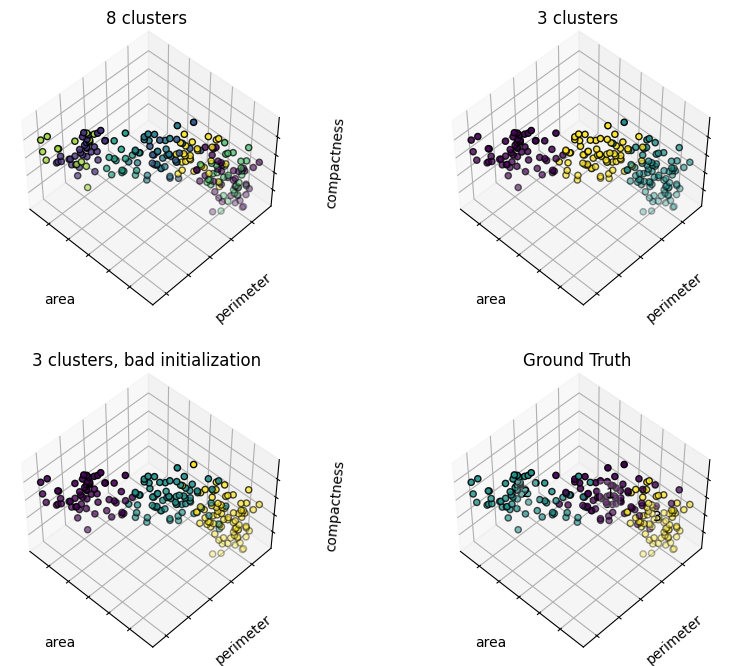

In [12]:
# Создаем три различные модели KMeans.
# Первая и вторая модели пытаются разделить на восемь и три кластера соответствено.
# Третья модель делит на три кластера, но с плохой инициализацией. Одна попытка и случайные центроиды.
estimators = [
    ("k_means_8", KMeans(n_clusters=8)),
    ("k_means_3", KMeans(n_clusters=3)),
    ("k_means_3_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

# Визуализация кластеров.
fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    # Обучение модели.
    est.fit(X)
    # Получение меток кластеров (номер кластера) после обучения.
    labels = est.labels_

    # Создание трехмерного графика.
    # Используются признаки area, perimeter и compactness.
    ax.scatter(X["area"], X["perimeter"], X["compactness"], c=labels.astype(float), edgecolor="k")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("area")
    ax.set_ylabel("perimeter")
    ax.set_zlabel("compactness")
    ax.set_title(title)

# Визуализация реальных кластеров.
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [(vals[0], 0), (vals[1], 1), (vals[2], 2)]:
    ds = dataset[dataset["seeds"]==name]
    ax.text3D(
        ds["area"].mean(),
        ds["perimeter"].mean(),
        ds["compactness"].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )

ax.scatter(X["area"], X["perimeter"], X["compactness"], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("area")
ax.set_ylabel("perimeter")
ax.set_zlabel("compactness")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

In [13]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

n_clusters = np.arange(2, 21) # Массив значений для количества кластеров, который варьируется от 2 до 20.

In [20]:
best_metric = [0, 10000, 0,[]]
''' Это список для отслеживания лучших результатов:
best_metric[0] — количество кластеров, при котором достигнут лучший результат.
best_metric[1] — наименьшее значение силуэтного коэффициента.
best_metric[2] — наибольшее значение индекса скорректированного Рэнда.
best_metric[3] — центры кластеров для лучшей модели. '''

silhouette_score_values = []
adjusted_rand_score_values = []
''' Это списки для хранения значений силуэтного коэффициента и индекса
скорректированного Рэнда для каждого количества кластеров. '''

for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    # Силуэтный коэффициент
    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    # Идекс Рэнда
    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

In [21]:
best_metric

[3,
 0.4719337319126887,
 0.7166198557361053,
 array([[11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
          4.75974026,  5.08851948],
        [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
          3.60359016,  6.06609836],
        [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
          2.64893333,  5.19231944]])]

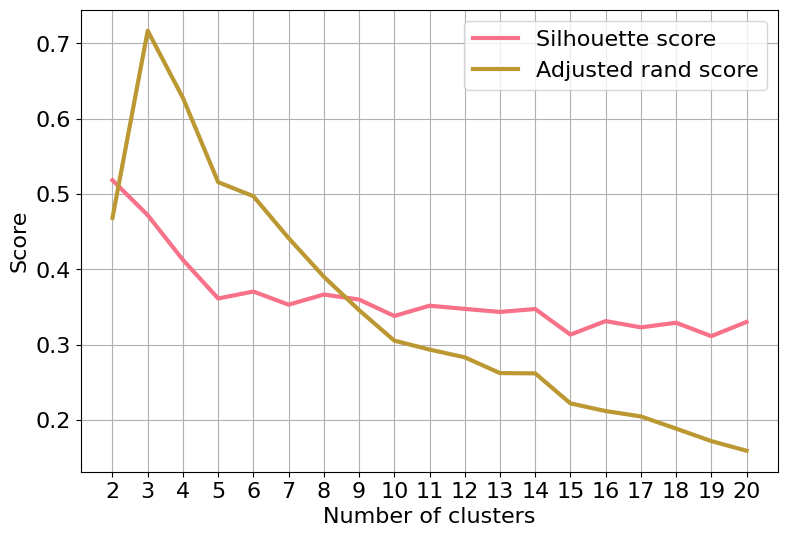

In [24]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)
plt.grid(True, axis='x')
plt.grid(True, axis='y')

plt.show()

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram

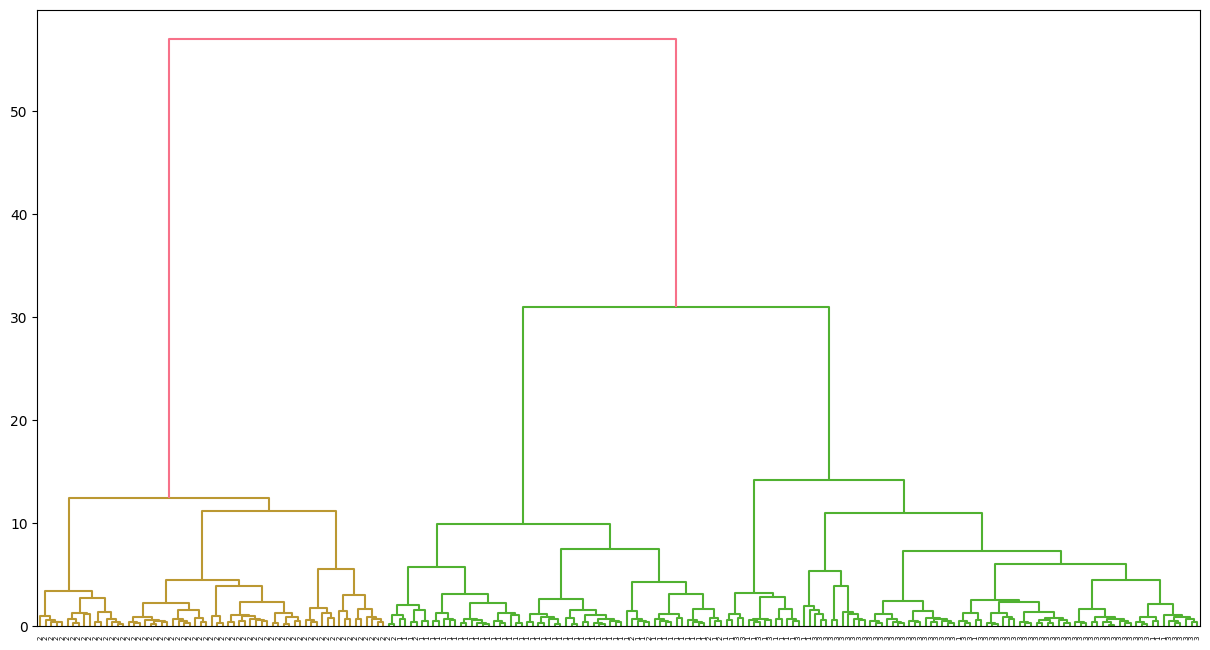

In [27]:
# Извлекаем данные в виде массива.
samples = df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# ward - минимизирует увеличение внутрикластерной дисперсии на каждом шаге объединения

plt.figure(figsize=(15, 8))
# Строим дендрограмму
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

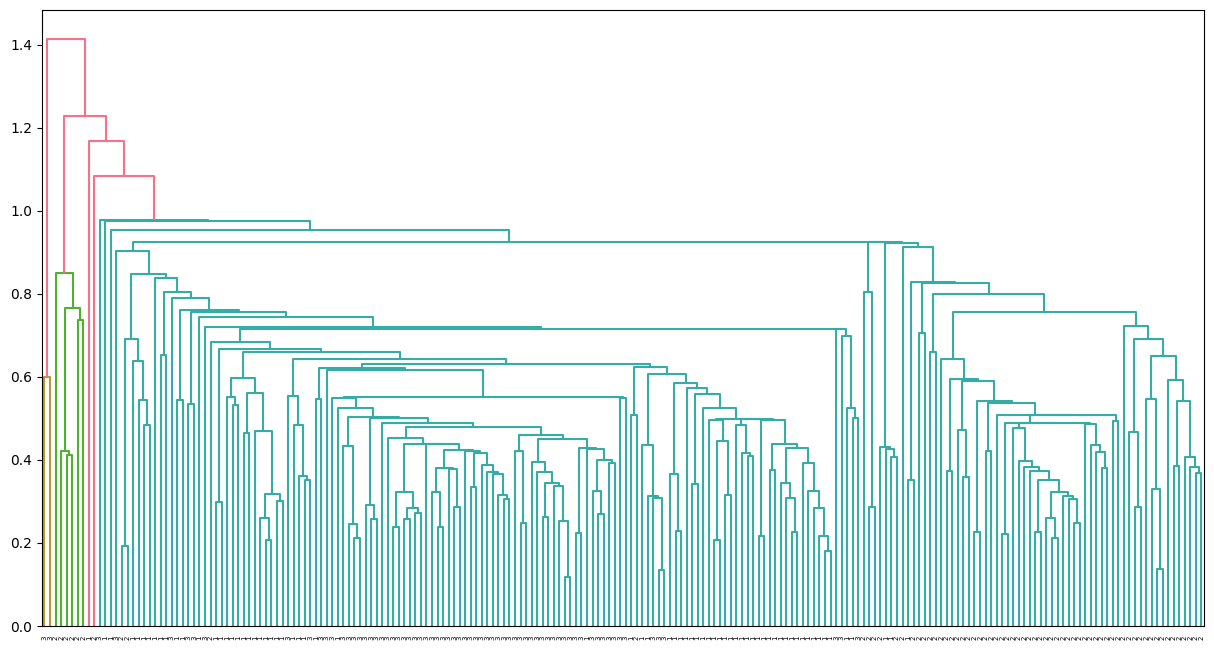

In [28]:
mergings = linkage(samples, method='single')
# single - минимальное расстояние между элементами кластеров.

plt.figure(figsize=(15, 8))
# Строим дендрограмму
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

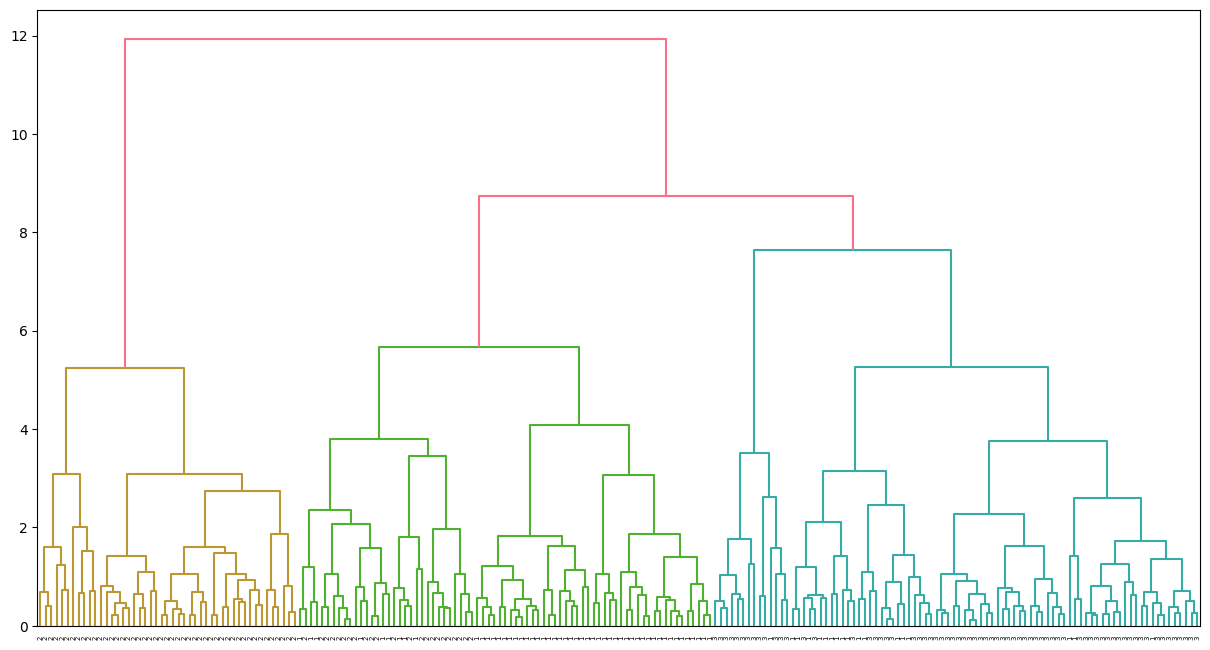

In [29]:
mergings = linkage(samples, method='complete')
# complete - максимальное расстояние между элементами кластеров

plt.figure(figsize=(15, 8))
# Строим дендрограмму
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

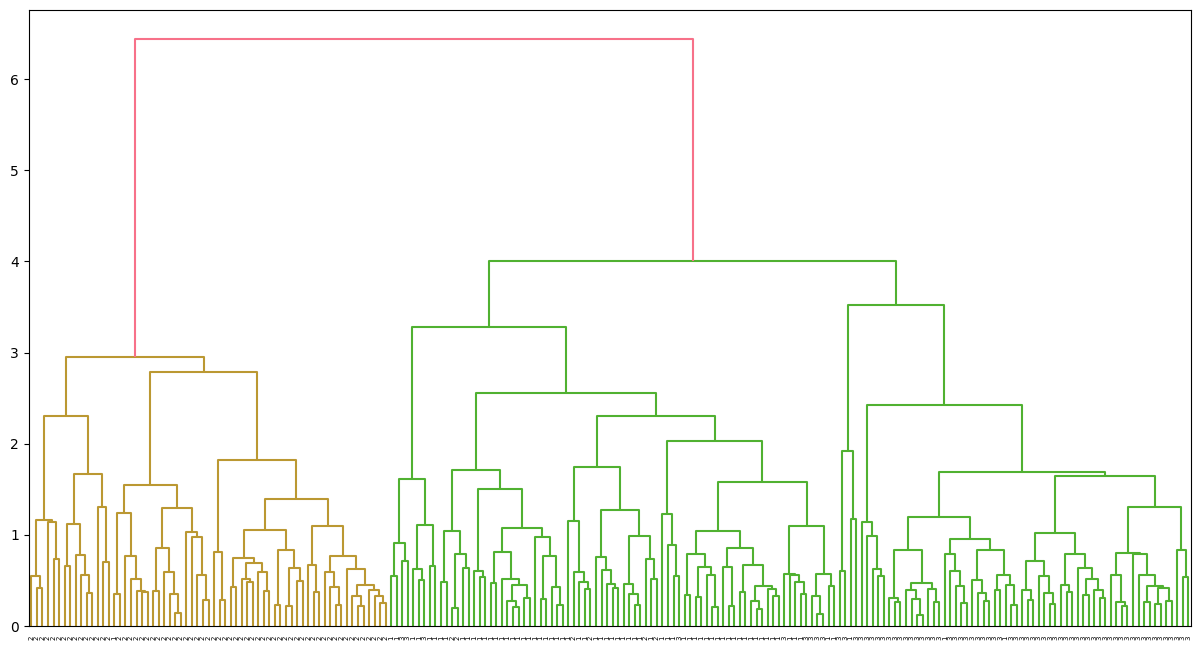

In [30]:
mergings = linkage(samples, method='average')
# average - среднее расстояние между элементами кластеров

plt.figure(figsize=(15, 8))
# Строим дендрограмму
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

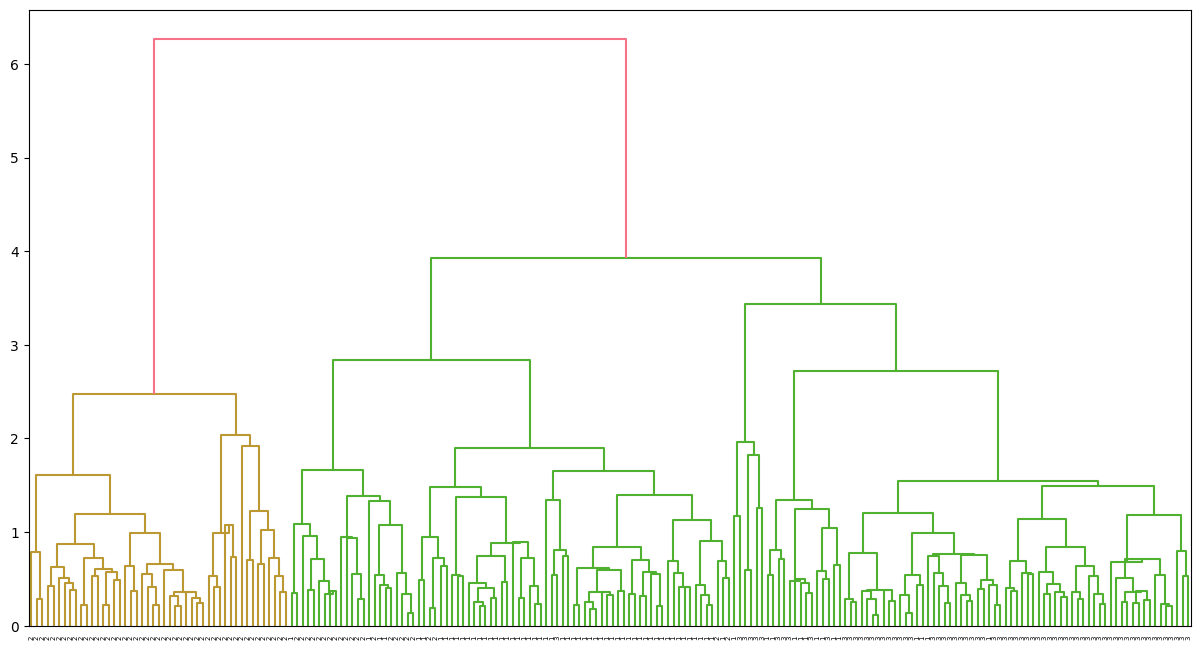

In [31]:
mergings = linkage(samples, method='centroid')
# average - среднее расстояние между элементами кластеров

plt.figure(figsize=(15, 8))
# Строим дендрограмму
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

Метод Уорда оказался наилучшим, так как при его использовании длины отрезков между уровнями на дендрограмме наиболее значительны. Это свидетельствует о том, что слияния кластеров происходят на больших расстояниях, что указывает на более четкое разделение данных на группы по сравнению с другими методами.

Подбираем eps для DBSCAN через метод "К-расстояний".

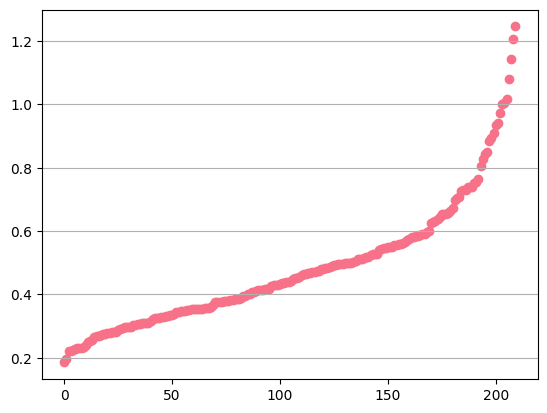

In [70]:
from sklearn.neighbors import NearestNeighbors

min_samples = 3

knn = NearestNeighbors(n_neighbors = min_samples, metric = 'l2')
knn.fit(X)

dists, inds = knn.kneighbors(X)
dists_ar = dists[:, 1:min_samples].mean(axis=1)
dists_ar.sort()
plt.scatter(x = range(len(dists_ar)), y=dists_ar)
plt.grid(True, axis='y')
plt.show()

In [32]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [33]:
mins = X.shape[1]

['y', 'b', 'g', 'r']


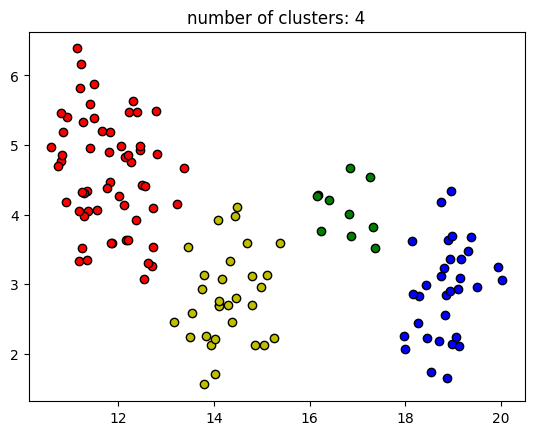

In [107]:
db = DBSCAN(eps=0.8, min_samples=10).fit(X)
# eps - радиус окружности, в пределах которого соседние точки считаются частью одного кластера.
# min_samples - минимальное количество точек, которые должны находиться в пределах радиуса eps, чтобы образовать плотный регион (кластер).
# низкое min_samples - шумная кластеризация. Одиночные точки объединяются в кластеры.
# высокое min_samples - может не найти кластеры.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Количество кластеров
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r'] # Цвета для кластеров
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy["area"], xy["asymmetry coefficient"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy["area"], xy["asymmetry coefficient"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


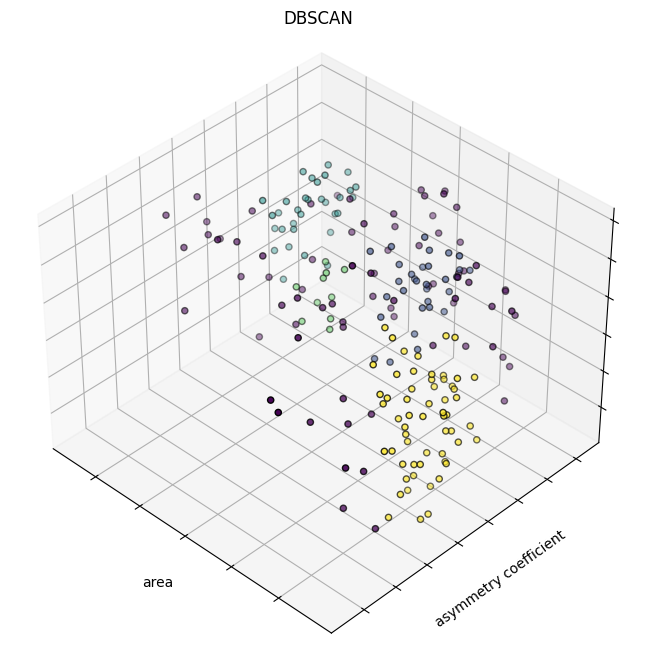

In [110]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=38, azim=134)

ax.scatter(X["area"], X["asymmetry coefficient"], X["compactness"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("area")
ax.set_ylabel("asymmetry coefficient")
ax.set_zlabel("compactness")
ax.set_title("DBSCAN")

plt.show()

In [109]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.15
Adjusted Rand Index: 0.37
